<a href="https://colab.research.google.com/github/sai-23may/Language-Detection/blob/main/ML_PACKAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# LOADING DATA

In [ ]:
english_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.bg-en.en", header=None, names=["English"])
english_df.head()

,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [ ]:
english_df=english_df[0:10000]

In [ ]:
german_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.de-en.de", header=None, names=["German"])
german_df.head()

,German
0,Wiederaufnahme der Sitzungsperiode
1,Ich erkläre die am Freitag
2,Wie Sie feststellen konnten
3,Im Parlament besteht der Wunsch nach einer Aus...
4,Heute möchte ich Sie bitten - das ist auch der...


In [ ]:
german_df.shape

(1916469, 1)

In [ ]:
german_df=german_df[0:10000]

In [ ]:
french_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.fr-en.fr", header=None, names=["French"])
french_df.head()

,French
0,Reprise de la session
1,Je déclare reprise la session du Parlement eur...
2,Comme vous avez pu le constater
3,Vous avez souhaité un débat à ce sujet dans le...
4,En attendant


In [ ]:
french_df=french_df[0:10000]

In [ ]:
spanish_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.es-en.es", header=None, names=["Spanish"])
spanish_df.head()

,Spanish
0,Reanudación del período de sesiones
1,Declaro reanudado el período de sesiones del P...
2,Como todos han podido comprobar
3,Sus Señorías han solicitado un debate sobre el...
4,A la espera de que se produzca


In [ ]:
spanish_df=spanish_df[0:10000]

In [ ]:
bulgarian_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.bg-en.bg", header=None, names=['Bulgarian'])
bulgarian_df.head()

,Bulgarian
0,Състав на Парламента: вж. протоколи
1,Одобряване на протокола от предишното заседани...
2,Състав на Парламента: вж. протоколи
3,Проверка на пълномощията: вж. протоколи
4,Внасяне на документи: вж. протоколи


In [ ]:
bulgarian_df=bulgarian_df[0:10000]

In [ ]:
czech_df = pd.read_csv("/content/drive/MyDrive/zip/europarl-v7.cs-en.cs", header=None, names=['Czech'])
czech_df.head()

,Czech
0,Následný postup na základě usnesení Parlamentu...
1,Předložení dokumentů: viz zápis
2,Písemná prohlášení (článek 116 jednacího řádu)...
3,Texty smluv dodané Radou: viz zápis
4,Složení Parlamentu: viz zápis


In [ ]:
czech_df=czech_df[0:10000]

In [ ]:
danish_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.da-en.da', header=None, names=['Danish'])
danish_df.head()

,Danish
0,Genoptagelse af sessionen
1,Jeg erklærer Europa-Parlamentets session
2,Som De kan se
3,De har udtrykt ønske om en debat om dette emne...
4,I mellemtiden ønsker jeg - som også en del kol...


In [ ]:
danish_df=danish_df[0:10000]

In [ ]:
finnish_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.fi-en.fi', header=None, names=['Finnish'])
finnish_df.head()

,Finnish
0,Istuntokauden uudelleenavaaminen
1,Julistan perjantaina joulukuun 17. päivänä kes...
2,Kuten olette varmaan saattaneet huomata
3,Te olette esittäneet toiveen
4,Sillä välin toivoisin


In [ ]:
finnish_df=finnish_df[0:10000]

In [ ]:
hungarian_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.hu-en.hu', header=None, names=['Hungarian'])
hungarian_df.head()

,Hungarian
0,A Parlament állásfoglalásaival kapcsolatos tov...
1,Dokumentumok benyújtása: lásd a jegyzőkönyvet
2,Írásbeli nyilatkozatok (az Eljárási Szabályzat...
3,A megállapodások szövegeinek Tanács általi elő...
4,A Parlament tagjai: lásd a jegyzőkönyvet


In [ ]:
hungarian_df=hungarian_df[0:10000]

In [ ]:
latvian_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.lv-en.lv', header=None, names=['Latvian'])
latvian_df.head()

,Latvian
0,Saistībā ar Parlamenta rezolūcijām veiktie pas...
1,Dokumentu iesniegšana (sk. protokolu)
2,Rakstiskas deklarācijas (Reglamenta 116. pants...
3,Padomes nosūtītie nolīgumu teksti (sk. protokolu)
4,Parlamenta sastāvs (sk. protokolu)


In [ ]:
latvian_df=latvian_df[0:10000]

In [ ]:
dutch_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.nl-en.nl', header=None, names=['Dutch'])
dutch_df.head()

,Dutch
0,Hervatting van de zitting
1,Ik verklaar de zitting van het Europees Parlement
2,Zoals u heeft kunnen constateren
3,U heeft aangegeven dat u deze vergaderperiode ...
4,Nu wil ik graag op verzoek van een aantal coll...


In [ ]:
dutch_df=dutch_df[0:10000]

In [ ]:
polish_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.pl-en.pl', header=None, names=['Polish'])
polish_df.head()

,Polish
0,Działania podjęte w wyniku rezolucji Parlament...
1,Składanie dokumentów: patrz protokół
2,Oświadczenia pisemne (art. 116 Regulaminu): pa...
3,Teksty porozumień przekazane przez Radę: patrz...
4,Skład Parlamentu: patrz protokół


In [ ]:
polish_df=polish_df[0:10000]

In [ ]:
portuguese_data = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.pt-en.pt', header=None, names=['Portuguese'])
portuguese_data.head()

,Portuguese
0,Reinício da sessão
1,Declaro reaberta a sessão do Parlamento Europeu
2,Como puderam constatar
3,Os senhores manifestaram o desejo de se proced...
4,Entretanto


In [ ]:
portuguese_data=portuguese_data[0:10000]

In [ ]:
romanian_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.ro-en.ro', header=None, names=['Romanian'])
romanian_df.head()

,Romanian
0,Componenţa Parlamentului: a se vedea procesul-...
1,Aprobarea procesului-verbal al şedinţei preced...
2,Componenţa Parlamentului: a se vedea procesul-...
3,Verificarea prerogativelor: a se vedea procesu...
4,Depunere de documente: a se vedea procesul-verbal


In [ ]:
romanian_df=romanian_df[0:10000]

In [ ]:
slovenian_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.sl-en.sl', header=None, names=['Slovenian'])
slovenian_df.head()

,Slovenian
0,Nadaljnje obravnavanje resolucij Parlamenta: g...
1,Predložitev dokumentov: glej zapisnik
2,Pisne izjave (člen 116): glej zapisnik
3,Posredovanje besedil sporazumov s strani Sveta...
4,Sestava Parlamenta: glej zapisnik


In [ ]:
slovenian_df=slovenian_df[0:10000]

In [ ]:
swedish_df = pd.read_csv('/content/drive/MyDrive/zip/europarl-v7.sv-en.sv', header=None, names=['Swedish'])
swedish_df.head()

,Swedish
0,Återupptagande av sessionen
1,Jag förklarar Europaparlamentets session återu...
2,"Som ni kunnat konstatera ägde ""den stora år 20..."
3,Ni har begärt en debatt i ämnet under sammantr...
4,Till dess vill jag att vi


In [ ]:
swedish_df=swedish_df[0:10000]

# PRE PROCESSING

In [ ]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [ ]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    line=str(line)
    #print(len(line))
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [ ]:
# Cleaning the data for german dataset

data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [ ]:
# Cleaning the data for french dataset

data_fre = []
lang_fre = []

for i, line in french_df.iterrows():
    line = line['French']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [ ]:
# Cleaning the data for spanish dataset

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

In [ ]:
# Cleaning the data for Bulgarian dataset

data_bul = []
lang_bul = []

for i, line in bulgarian_df.iterrows():
    line = line['Bulgarian']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Bulgarian")

In [ ]:
# Cleaning the data for Czech dataset

data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Czech")

In [ ]:
# Cleaning the data for Danish dataset

data_dan = []
lang_dan = []

for i, line in danish_df.iterrows():
    line = line['Danish']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Danish")

In [ ]:
# Cleaning the data for finnish dataset

data_fin = []
lang_fin = []

for i, line in finnish_df.iterrows():
    line = line['Finnish']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Finnish")

In [ ]:

# Cleaning the data for Hugarian dataset

data_hung = []
lang_hung = []

for i, line in hungarian_df.iterrows():
    line = line['Hungarian']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Hungarian")

In [ ]:
# Cleaning the data for Latvian dataset

data_lat = []
lang_lat = []

for i, line in latvian_df.iterrows():
    line = line['Latvian']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Latvian")

In [ ]:

# Cleaning the data for Polish dataset

data_pol = []
lang_pol = []

for i, line in polish_df.iterrows():
    line = line['Polish']
    line = str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Polish")

In [ ]:
# Cleaning the data for Portuguese dataset

data_port = []
lang_port = []

for i, line in portuguese_data.iterrows():
    line = line['Portuguese']
    line = str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Portuguese")

In [ ]:

# Cleaning the data for Romanian dataset

data_rom = []
lang_rom = []

for i, line in romanian_df.iterrows():
    line = line['Romanian']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Romanian")

In [ ]:
# Cleaning the data for Romanian dataset

data_slo = []
lang_slo = []

for i, line in slovenian_df.iterrows():
    line = line['Slovenian']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Slovenian")

In [ ]:
# Cleaning the data for Dutch dataset

data_dutch = []
lang_dutch = []

for i, line in dutch_df.iterrows():
    line = line['Dutch']
    line=str(line)
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Dutch")

# DATA FRAME

In [ ]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_fre+data_esp+data_bul+data_czech+data_dan+data_fin+data_hung+data_lat+data_dutch+data_port+data_pol+data_rom+data_slo,
    "Language" : lang_eng+lang_ger+lang_fre+lang_esp+lang_bul+lang_czech+lang_dan+lang_fin+lang_hung+lang_lat+lang_dutch+lang_port+lang_pol+lang_rom+lang_slo
})

print(df.shape)

(150000, 2)


In [ ]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [ ]:
df.tail()

,Text,Language
149995,mijn vraag,Dutch
149996,denkt u nu werkelijk dat het parlement nu wij...,Dutch
149997,commissaris byrne,Dutch
149998,wij hebben twee jaar onderhandeld over het wet...,Dutch
149999,ik kijk uit naar onze gemeenschappelijke gespr...,Dutch


In [ ]:
df['Language'].value_counts()

Slovenian     10000
Bulgarian     10000
Polish        10000
Portuguese    10000
Hungarian     10000
Latvian       10000
Dutch         10000
Czech         10000
Danish        10000
German        10000
English       10000
French        10000
Spanish       10000
Finnish       10000
Romanian      10000
Name: Language, dtype: int64

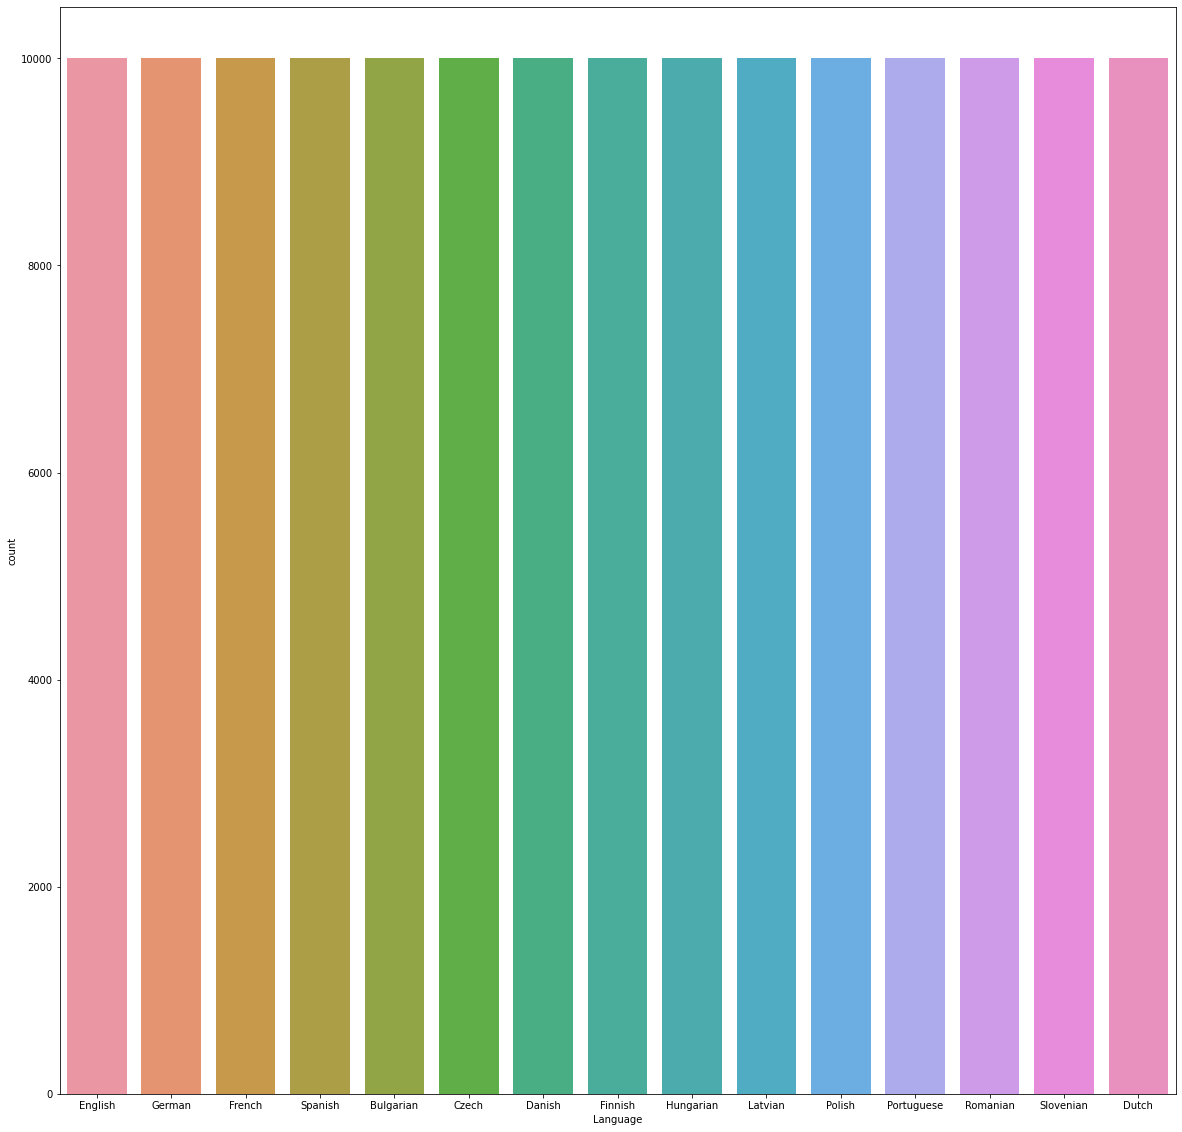

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

In [ ]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [ ]:
y

0         English
1         English
2         English
3         English
4         English
           ...   
149995      Dutch
149996      Dutch
149997      Dutch
149998      Dutch
149999      Dutch
Name: Language, Length: 150000, dtype: object

In [ ]:
x.iloc[1:5]

1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

# NAIVE BAYES

In [ ]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [ ]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)

In [ ]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 92.81333333333333 % accuracy


In [ ]:
matrix = metrics.confusion_matrix(y_test, mnb_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1757    1    2   17   45    1  191   25    1    0    5    2   14    2
    14]
 [   2 1829    0    0   20    0   85    8    2    0   11    1   10   13
     9]
 [   0    0 1920    7    4    1    4    9    1    1   10    1    3    8
     4]
 [   0    0    3 1995    0    1    2    3    1    0    0    0    1    1
     2]
 [   0    3    6   19 1709    4  208   11    4    0    4   35   10    5
     6]
 [   0    0    1    1    2 1987    6    3    0    0    0    6    0    1
     0]
 [   0    0    5    8    6    4 1913    3    0    1    0    6    3    3
     6]
 [   0    0    4   11    2    0    9 1948    0    0    0    1    1    2
     0]
 [   1    2    5    4   15    7   80    7 1864    0    6    4    7   11
    15]
 [   0    2    2    4   11    3   98   12    0 1802    1    3    9    3
    11]
 [   1    5    4    3   20    7  103    8    2    0 1791    4    5   14
    12]
 [   0    0    0    4    3    3   12    2    6    1    0 1895    2    6
    94]
 [   6    3    3   1

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)

In [ ]:
acc_score=0
for train_index, test_index in kf.split(x):
    pipe_mnb = pipeline.Pipeline([
      ('vectorizer', vectorizer),
      ('clf', MultinomialNB())
    ])
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    pipe_mnb.fit(X_train, Y_train)
    Y_pred=pipe_mnb.predict(X_test)
    acc_score+=metrics.accuracy_score(Y_test,Y_pred) 
print(acc_score/10)

0.9293733333333332


# LOGISTIC REGRESSION

In [ ]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [ ]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

In [ ]:
lr_predicted = pipe_lr.predict(x_test)

In [ ]:
x_test

55556     v rámci pracovního programu vzdělávání a odbor...
136673    poročilo o skupni ureditvi trga mleka in mlečn...
46695     ако искате да разгледаме устойчивата политика ...
108041                 bez wątpienia czwartą cechą sytuacji
95995           par alkohola marķēšanu ir skaidri noteikumi
                                ...                        
89485                                                    az
31093                            esto me parece inaceptable
145874    het is echter belangrijk om te benadrukken dat...
76538                                  lopuksi haluan sanoa
1378                    agenda for next sitting see minutes
Name: Text, Length: 30000, dtype: object

In [ ]:
pipe_lr.predict(x_test.iloc[1:5])

array(['Slovenian', 'Bulgarian', 'Polish', 'Latvian'], dtype=object)

In [ ]:
x_test.iloc[1:5]

136673    poročilo o skupni ureditvi trga mleka in mlečn...
46695     ако искате да разгледаме устойчивата политика ...
108041                 bez wątpienia czwartą cechą sytuacji
95995           par alkohola marķēšanu ir skaidri noteikumi
Name: Text, dtype: object

In [ ]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 94.33666666666667 % accuracy


In [ ]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1951    2    0    0   37    1    6    8    2    2    2    2   50    4
    10]
 [  98 1834    0    0   17    0    4    3    4    0    5    1   10   10
     4]
 [   2    0 1933    1    7    1    2    2    3    1    3    3    6    6
     3]
 [   0    0    3 1982    4    1    1    9    1    1    2    3    1    0
     1]
 [ 191    2    3    0 1787    0    3    2    1    2    3    5   21    2
     2]
 [   3    0    3    0    2 1991    0    3    0    0    3    1    0    0
     1]
 [   3    2    0    1    7    0 1924    2    3    1    0    3    8    1
     3]
 [   9    0    6    0    2    0    1 1951    1    0    1    1    5    1
     0]
 [  87    3    4    0   13    1    3    1 1890    2    1    2   12    2
     7]
 [  93    4    2    0    8    0    4    4    3 1813    0    4   18    1
     7]
 [ 113    4    0    0   15    0    4    3    4    2 1807    2   14    4
     7]
 [   0    1    0    0    0    2    4    1    5    2    1 1968    3    3
    38]
 [ 222    2    2    

In [ ]:
acc_score=0
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    pipe_lr.fit(X_train, Y_train)
    Y_pred=pipe_lr.predict(X_test)
    acc_score+=metrics.accuracy_score(Y_test,Y_pred) 
print(acc_score/10)

0.94224


# DEEP LEARNING

In [ ]:
X = vectorizer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [ ]:
X_train=convert_sparse_matrix_to_sparse_tensor(X_train)
X_test=convert_sparse_matrix_to_sparse_tensor(X_test)

In [ ]:
map={'Polish':0, 'English':1, 'Finnish':2, 'Slovenian':3, 'Hungarian':4, 'German':5,
       'Latvian':6, 'Dutch':7, 'Bulgarian':8, 'French':9, 'Romanian':10, 'Spanish':11,
       'Danish':12, 'Portuguese':13, 'Czech':14}
Y=Y_train.replace(map)
Y_test=Y_test.replace(map)

In [ ]:
Y=pd.get_dummies(Y)
Y=Y.to_numpy()
Y.shape

(120000, 15)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

#Get training data
#x = train_feat.drop('lang',axis=1)
#y = encode(train_feat['lang'])

#Define model
model = Sequential()
model.add(Dense(500, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               18452000  
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 15)                3765      
                                                                 
Total params: 18,831,515
Trainable params: 18,831,515
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train model
model.fit(X_train, Y, epochs=4, batch_size=100)

Epoch 1/4
1200/1200 [==============================] - 33s 25ms/step - loss: 0.2259 - accuracy: 0.9309
Epoch 2/4
1200/1200 [==============================] - 30s 25ms/step - loss: 0.1340 - accuracy: 0.9495
Epoch 3/4
1200/1200 [==============================] - 30s 25ms/step - loss: 0.1245 - accuracy: 0.9518
Epoch 4/4
1200/1200 [==============================] - 30s 25ms/step - loss: 0.1212 - accuracy: 0.9528


In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
classes_x

array([14,  9, 10, ...,  0, 14,  8])

In [ ]:
Y_test

59770     14
21362      9
127324    10
140509     7
144297     7
          ..
30430     11
63244     12
104970     0
53960     14
49315      8
Name: Language, Length: 30000, dtype: int64

In [ ]:
dl_acc = (metrics.accuracy_score(Y_test, classes_x))*100
print('The Deep learning has:',dl_acc,'% accuracy')

The Deep learning has: 94.13 % accuracy


In [ ]:
X_test

In [ ]:
s=['non']
s=vectorizer.transform(s)
s=convert_sparse_matrix_to_sparse_tensor(s)
predict=model.predict(s) 
inv_map = {v: k for k, v in map.items()}
inv_map[np.argmax(predict,axis=1)[0]]

'French'

# DECISION TREE



In [ ]:
from sklearn.tree import DecisionTreeClassifier 

pipe_Dc = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('Dc_clf', DecisionTreeClassifier())
])

In [ ]:
pipe_Dc.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('Dc_clf', DecisionTreeClassifier())])

In [ ]:
Dc_predicted = pipe_Dc.predict(x_test)

In [ ]:
Dc_acc = (metrics.accuracy_score(y_test, Dc_predicted))*100
print('The DecisionTree Classifier has :',Dc_acc,'% accuracy')

The DecisionTree Classifier has : 88.47333333333334 % accuracy


In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
acc_score=0
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    pipe_Dc.fit(X_train, Y_train)
    Y_pred=pipe_Dc.predict(X_test)
    acc_score+=metrics.accuracy_score(Y_test,Y_pred) 
print(acc_score/10)

0.8846866666666667


In [ ]:
matrix = metrics.confusion_matrix(y_test, Dc_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1956   37    0    0   24    0    1    0    1    1    3    1   52    0
     1]
 [ 118 1704    3    3   18    3   13    1   36    3   17   23    6   33
     9]
 [   4   10 1814   21   19   13   20   23   12    7    2    7    5    6
    10]
 [   2    0   23 1830   24   11   13   58    6    8    9    2    5    7
    11]
 [ 217    8   16    9 1619    6   33   20    2    4   17   18   30    9
    16]
 [   5    2   12   13    5 1903   10   11    3   10    5    8    3   13
     4]
 [   4   10   22    2   22   12 1807   10    6    3    5   16   13    3
    23]
 [  11    3   30   37   18   13    9 1799    3    9   13    6    6   12
     9]
 [ 105   46   15    9   11    8    9    5 1760    4   13    5    8   17
    13]
 [ 113   18    4    1    6    7    3    4    9 1744   11    5   13   17
     6]
 [ 136   22    2    3   20    1    5   11   13    8 1727    4    8   14
     5]
 [   2   19    5    6    6    8   37    6    5    5    5 1785   12   16
   111]
 [ 270   12    3    

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
pipe_knn = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('knn_clf', KNeighborsClassifier(n_neighbors=5))
])
pipe_knn.fit(x_train, y_train)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('knn_clf', KNeighborsClassifier())])

In [ ]:
knn_predicted = pipe_knn.predict(x_test)

In [ ]:
knn_acc = (metrics.accuracy_score(y_test, knn_predicted))*100
print('The KNN Classifier has :',knn_acc,'% accuracy')

The KNN Classifier has : 73.11999999999999 % accuracy


In [ ]:
matrix = metrics.confusion_matrix(y_test, knn_predicted )
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1761   42    0    0   27    0    2    1   10    7    3    1   39  184
     0]
 [ 383 1030    0    0  187    1    0    0   36   37   35    0  162  119
     0]
 [ 161   47 1537    4   77    1    6    6   14   16   14    2   64   21
     3]
 [  82   27   11 1797   30    0    3    1    9   10    6    3   23    7
     0]
 [ 146   22    3    0 1569    0    4    2   10    8    7    0   51  200
     2]
 [ 181   44    7    1  107 1530    0    2   23   13   10    0   63   25
     1]
 [  92   30    9    1   60    0 1657    1   19    9   12    2   49   15
     2]
 [ 155   32    7    6   79    2    2 1556   16   17   16    0   68   22
     0]
 [ 326   75    2    0  201    0    1    0 1096   39   56    0  121  111
     0]
 [ 247   66    3    0  137    0    1    0   44 1205   28    0  112  118
     0]
 [ 265   82    2    0  145    0    3    0   39   27 1200    0   99  116
     1]
 [ 114   34    1    2   59    3    9    1   18   12   11 1627   44   13
    80]
 [ 163   43    0    

# SUMMARY


              MODEL              | accuracy      | 
              -------------------|---------------|
              logestic regression| 94.22         |  
              knn                | 73.11         |  
              deep learning      | 94.13         |  
              decision tree      | 88.46         |  
              naive bayes        | 92.93         |  